In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, noise=10, n_features=2, random_state=42)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [8]:
X_train

array([[-0.54872491,  0.0928449 ],
       [ 1.22766899, -1.20964102],
       [ 0.0675282 , -1.42474819],
       ...,
       [ 0.89519322,  0.6351718 ],
       [-0.36096617,  1.1593298 ],
       [ 0.20109905,  1.0506544 ]], shape=(670, 2))

In [9]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5, algorithm="auto", weights='uniform')
regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [10]:
y_pred = regressor.predict(X_test)
print(f'The predicted values are : {y_pred}')

The predicted values are : [ 41.76673258  -7.59437128 -16.65330434 -12.40227133  36.50390441
  20.2429261   61.33943992 -29.17202648 -71.76709886 -11.9092177
  16.33441338  -3.05077276 -67.94559513  59.90553659  15.71045932
   0.1568295  -60.10947793  25.4844424  -28.8095753   27.02911181
  20.8555342   15.65608547 -23.61510645 -41.03200396 -43.92434524
  25.77610628 -58.95652775  61.61204386 -22.26969946  73.57828341
 -77.28105454  33.68023612 -59.88441434  -7.59437128 -52.41802667
  -6.1272399   20.57984555  32.86381788  14.41379048 -46.12209025
  84.06465502  28.9556839   40.33491469 -70.67778804  21.6520122
  23.45246046 -30.06738109  -7.56893351  60.3765076   66.69890142
  61.10758863  77.06956965 -57.91445319 -32.73737476 -46.12209025
 -24.65667254 -33.56726916  34.05975968  89.90091082  29.61443663
  37.95277128   5.04859495 -23.51901164  -4.11565876  -7.80691962
 -16.65330434   3.49171402  21.67231896 -12.90919449 -57.26160031
  40.66972968  78.00157096  61.11775102   1.4756706

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R2 score : {r2_score(y_test,y_pred)}')
print(f'Mean Absolute error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean squared error : {mean_squared_error(y_test,y_pred)}')

R2 score : 0.9155927746462499
Mean Absolute error : 9.269174435861805
Mean squared error : 132.70133826064995


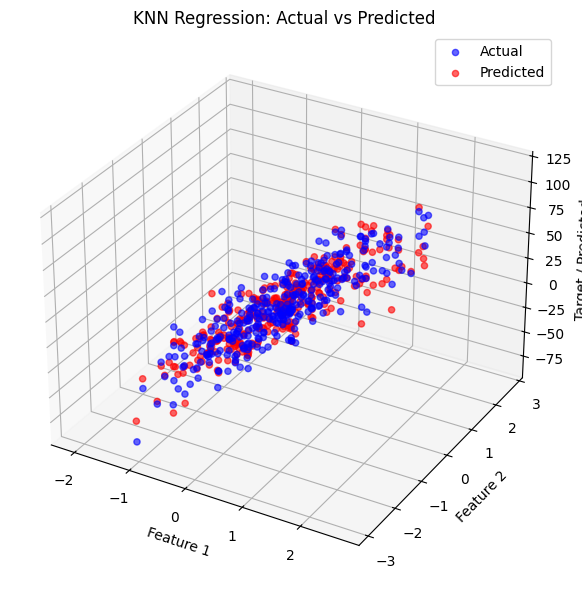

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot actual test data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='blue', label='Actual', alpha=0.6)

# Plot predicted values
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Predicted', alpha=0.6)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target / Predicted")
ax.set_title("KNN Regression: Actual vs Predicted")
ax.legend()
plt.tight_layout()
plt.show()

In [23]:
# hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'p': [2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best MSE (negative):", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best MSE (negative): -129.4716094734302
Test MSE: 124.93909949130706


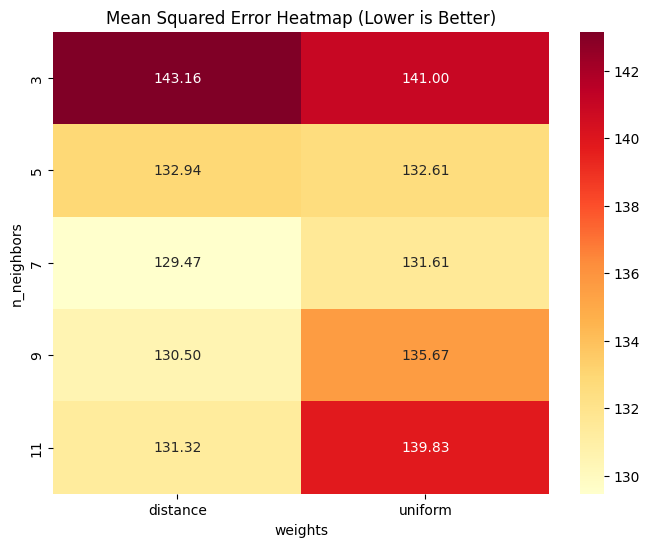

In [24]:
import pandas as pd
import seaborn as sns
results = pd.DataFrame(grid_search.cv_results_)

# Pivot table for heatmap (neg_mean_squared_error is negative, so we use -1 * score)
heatmap_data = results.pivot(index='param_n_neighbors', columns='param_weights', values='mean_test_score')
heatmap_data = -1 * heatmap_data  # convert to positive MSE for better interpretation

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Mean Squared Error Heatmap (Lower is Better)")
plt.ylabel("n_neighbors")
plt.xlabel("weights")
plt.show()